### Pré-processamento dados estruturados: toy

In [40]:
import numpy as np # array and vector manipulation
import pandas as pd # data manipulation

import seaborn as sns
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from joblib import Parallel, delayed
import multiprocessing as mp

In [41]:
#carregando os dados
data_teste = pd.read_csv('FSI_Data_2006_2023.csv')
data_teste

,Country,Year,Rank,Security Apparatus,Factionalized Elites,Group Grievance,Economy,Economic Inequality,Human Flight and Brain Drain,State Legitimacy,Public Services,Human Rights,Demographic Pressures,Refugees and IDPs,External Intervention,Total
0,Sudan,2006,1st,9.8,9.1,9.7,7.5,9.2,9.1,9.5,9.5,9.8,9.6,9.7,9.8,112.3
1,Congo Democratic Republic,2006,2nd,9.8,9.6,9.1,8.1,9.0,8.0,9.0,9.0,9.5,9.5,9.5,10.0,110.1
2,Cote d'Ivoire,2006,3rd,9.8,9.8,9.8,9.0,8.0,8.5,10.0,8.5,9.4,8.8,7.6,10.0,109.2
3,Iraq,2006,4th,9.8,9.7,9.8,8.2,8.7,9.1,8.5,8.3,9.7,8.9,8.3,10.0,109.0
4,Zimbabwe,2006,5th,9.4,8.5,8.5,9.8,9.2,9.0,8.9,9.5,9.5,9.7,8.9,8.0,108.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,Switzerland,2023,175th,2.4,3.2,2.1,1.0,2.4,1.6,0.3,1.6,0.4,1.4,1.0,0.4,17.8
3166,New Zealand,2023,176th,1.1,1.2,2.0,1.6,2.6,2.6,0.5,1.1,0.5,1.6,1.4,0.5,16.7
3167,Finland,2023,177th,1.7,1.9,0.3,1.5,1.6,2.7,0.4,1.0,0.5,2.0,1.4,1.0,16.0
3168,Iceland,2023,178th,1.5,1.5,0.5,1.6,1.5,2.6,0.4,0.9,0.4,0.4,1.8,2.6,15.7


In [42]:
#Visualização das primeiras instâncias
data_teste.head()

,Country,Year,Rank,Security Apparatus,Factionalized Elites,Group Grievance,Economy,Economic Inequality,Human Flight and Brain Drain,State Legitimacy,Public Services,Human Rights,Demographic Pressures,Refugees and IDPs,External Intervention,Total
0,Sudan,2006,1st,9.8,9.1,9.7,7.5,9.2,9.1,9.5,9.5,9.8,9.6,9.7,9.8,112.3
1,Congo Democratic Republic,2006,2nd,9.8,9.6,9.1,8.1,9.0,8.0,9.0,9.0,9.5,9.5,9.5,10.0,110.1
2,Cote d'Ivoire,2006,3rd,9.8,9.8,9.8,9.0,8.0,8.5,10.0,8.5,9.4,8.8,7.6,10.0,109.2
3,Iraq,2006,4th,9.8,9.7,9.8,8.2,8.7,9.1,8.5,8.3,9.7,8.9,8.3,10.0,109.0
4,Zimbabwe,2006,5th,9.4,8.5,8.5,9.8,9.2,9.0,8.9,9.5,9.5,9.7,8.9,8.0,108.9


In [43]:
#Visualização das últimas instâncias
data_teste.tail()

,Country,Year,Rank,Security Apparatus,Factionalized Elites,Group Grievance,Economy,Economic Inequality,Human Flight and Brain Drain,State Legitimacy,Public Services,Human Rights,Demographic Pressures,Refugees and IDPs,External Intervention,Total
3165,Switzerland,2023,175th,2.4,3.2,2.1,1.0,2.4,1.6,0.3,1.6,0.4,1.4,1.0,0.4,17.8
3166,New Zealand,2023,176th,1.1,1.2,2.0,1.6,2.6,2.6,0.5,1.1,0.5,1.6,1.4,0.5,16.7
3167,Finland,2023,177th,1.7,1.9,0.3,1.5,1.6,2.7,0.4,1.0,0.5,2.0,1.4,1.0,16.0
3168,Iceland,2023,178th,1.5,1.5,0.5,1.6,1.5,2.6,0.4,0.9,0.4,0.4,1.8,2.6,15.7
3169,Norway,2023,179th,1.4,1.7,3.1,0.7,1.4,1.4,0.4,1.0,0.4,1.4,1.1,0.5,14.5


In [44]:
#Verificação do tamanho da matriz
data_teste.shape

(3170, 16)

In [45]:
#Informações dos atributos
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       3170 non-null   object 
 1   Year                          3170 non-null   int64  
 2   Rank                          3170 non-null   object 
 3   Security Apparatus            3170 non-null   float64
 4   Factionalized Elites          3170 non-null   float64
 5   Group Grievance               3170 non-null   float64
 6   Economy                       3170 non-null   float64
 7   Economic Inequality           3170 non-null   float64
 8   Human Flight and Brain Drain  3170 non-null   float64
 9   State Legitimacy              3170 non-null   float64
 10  Public Services               3170 non-null   float64
 11  Human Rights                  3170 non-null   float64
 12  Demographic Pressures         3170 non-null   float64
 13  Ref

In [46]:
#Nomes dos atributos (colunas)
data_teste.columns

Index(['Country', 'Year', 'Rank', 'Security Apparatus', 'Factionalized Elites',
       'Group Grievance', 'Economy', 'Economic Inequality',
       'Human Flight and Brain Drain', 'State Legitimacy', 'Public Services',
       'Human Rights', 'Demographic Pressures', 'Refugees and IDPs',
       'External Intervention', 'Total'],
      dtype='object')

In [47]:
#Quantidade de instâncias por atributo
data_teste.count()

Country                         3170
Year                            3170
Rank                            3170
Security Apparatus              3170
Factionalized Elites            3170
Group Grievance                 3170
Economy                         3170
Economic Inequality             3170
Human Flight and Brain Drain    3170
State Legitimacy                3170
Public Services                 3170
Human Rights                    3170
Demographic Pressures           3170
Refugees and IDPs               3170
External Intervention           3170
Total                           3170
dtype: int64

In [48]:
#Estatísticas dos atributos
data_teste.describe()

,Year,Security Apparatus,Factionalized Elites,Group Grievance,Economy,Economic Inequality,Human Flight and Brain Drain,State Legitimacy,Public Services,Human Rights,Demographic Pressures,Refugees and IDPs,External Intervention,Total
count,3170.000000,3170.000000,3170.000000,3170.000000,3170.000000,3170.000000,3170.000000,3170.000000,3170.000000,3170.000000,3170.000000,3170.000000,3170.000000,3170.000000
mean,2014.601577,5.642271,6.229653,5.947981,5.678675,6.102587,5.549905,6.150442,5.606656,5.756151,5.982271,5.124448,5.665899,69.437035
std,5.145586,2.350244,2.462534,2.108681,1.964632,2.073265,2.062074,2.574501,2.491939,2.434419,2.287515,2.391174,2.397771,23.671346
min,2006.000000,0.300000,0.500000,0.300000,0.400000,0.500000,0.400000,0.200000,0.600000,0.300000,0.300000,0.400000,0.300000,14.500000
25%,2010.000000,4.000000,4.300000,4.325000,4.225000,4.700000,4.100000,4.400000,3.700000,3.800000,4.200000,3.100000,4.000000,52.500000
50%,2015.000000,5.900000,6.900000,6.000000,5.800000,6.500000,6.000000,6.700000,5.800000,6.200000,6.100000,4.900000,6.000000,73.800000
75%,2019.000000,7.300000,8.100000,7.600000,7.100000,7.800000,7.100000,8.100000,7.800000,7.600000,8.000000,7.100000,7.400000,86.300000
max,2023.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,114.900000


In [49]:
#Visualização da base de dados
data_teste

,Country,Year,Rank,Security Apparatus,Factionalized Elites,Group Grievance,Economy,Economic Inequality,Human Flight and Brain Drain,State Legitimacy,Public Services,Human Rights,Demographic Pressures,Refugees and IDPs,External Intervention,Total
0,Sudan,2006,1st,9.8,9.1,9.7,7.5,9.2,9.1,9.5,9.5,9.8,9.6,9.7,9.8,112.3
1,Congo Democratic Republic,2006,2nd,9.8,9.6,9.1,8.1,9.0,8.0,9.0,9.0,9.5,9.5,9.5,10.0,110.1
2,Cote d'Ivoire,2006,3rd,9.8,9.8,9.8,9.0,8.0,8.5,10.0,8.5,9.4,8.8,7.6,10.0,109.2
3,Iraq,2006,4th,9.8,9.7,9.8,8.2,8.7,9.1,8.5,8.3,9.7,8.9,8.3,10.0,109.0
4,Zimbabwe,2006,5th,9.4,8.5,8.5,9.8,9.2,9.0,8.9,9.5,9.5,9.7,8.9,8.0,108.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,Switzerland,2023,175th,2.4,3.2,2.1,1.0,2.4,1.6,0.3,1.6,0.4,1.4,1.0,0.4,17.8
3166,New Zealand,2023,176th,1.1,1.2,2.0,1.6,2.6,2.6,0.5,1.1,0.5,1.6,1.4,0.5,16.7
3167,Finland,2023,177th,1.7,1.9,0.3,1.5,1.6,2.7,0.4,1.0,0.5,2.0,1.4,1.0,16.0
3168,Iceland,2023,178th,1.5,1.5,0.5,1.6,1.5,2.6,0.4,0.9,0.4,0.4,1.8,2.6,15.7


In [50]:
#Renomeando um atributo
data_teste.rename(columns={'total.emprestimo': 'emprestimo'})

,Country,Year,Rank,Security Apparatus,Factionalized Elites,Group Grievance,Economy,Economic Inequality,Human Flight and Brain Drain,State Legitimacy,Public Services,Human Rights,Demographic Pressures,Refugees and IDPs,External Intervention,Total
0,Sudan,2006,1st,9.8,9.1,9.7,7.5,9.2,9.1,9.5,9.5,9.8,9.6,9.7,9.8,112.3
1,Congo Democratic Republic,2006,2nd,9.8,9.6,9.1,8.1,9.0,8.0,9.0,9.0,9.5,9.5,9.5,10.0,110.1
2,Cote d'Ivoire,2006,3rd,9.8,9.8,9.8,9.0,8.0,8.5,10.0,8.5,9.4,8.8,7.6,10.0,109.2
3,Iraq,2006,4th,9.8,9.7,9.8,8.2,8.7,9.1,8.5,8.3,9.7,8.9,8.3,10.0,109.0
4,Zimbabwe,2006,5th,9.4,8.5,8.5,9.8,9.2,9.0,8.9,9.5,9.5,9.7,8.9,8.0,108.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,Switzerland,2023,175th,2.4,3.2,2.1,1.0,2.4,1.6,0.3,1.6,0.4,1.4,1.0,0.4,17.8
3166,New Zealand,2023,176th,1.1,1.2,2.0,1.6,2.6,2.6,0.5,1.1,0.5,1.6,1.4,0.5,16.7
3167,Finland,2023,177th,1.7,1.9,0.3,1.5,1.6,2.7,0.4,1.0,0.5,2.0,1.4,1.0,16.0
3168,Iceland,2023,178th,1.5,1.5,0.5,1.6,1.5,2.6,0.4,0.9,0.4,0.4,1.8,2.6,15.7


In [ ]:
#Verificando os valores únicos de um determinado atributo
data_teste['estado'].unique()

array(['MA', 'SP', 'BA', 'DF', 'RS', 'SE', 'RN', 'AL', 'PA', 'AP', 'MG',
       'PE', 'PR', 'ES', 'AC', 'PI', 'RJ', 'RR', 'MS', 'TO', 'MT', 'CE',
       'GO', 'RO', 'PB', 'SC', 'AM'], dtype=object)

<Axes: ylabel='Frequency'>

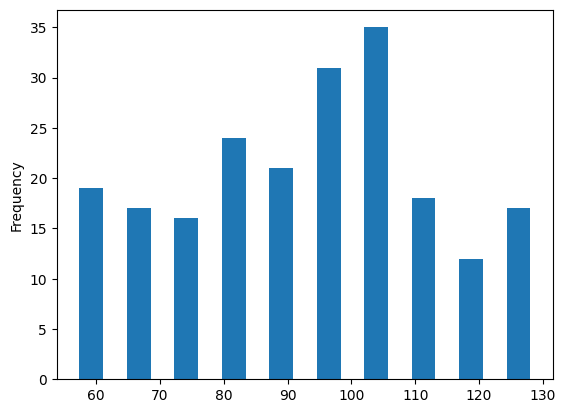

In [ ]:
#Plot do histograma de um atributo
data_teste['peso'].plot.hist(rwidth=0.5)

<Axes: ylabel='altura'>

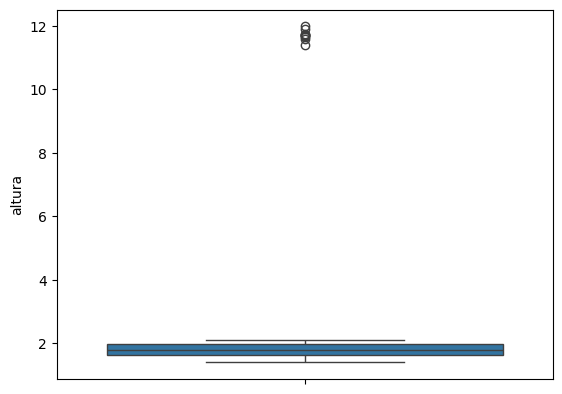

In [ ]:
#Boxplot: gráfico utilizado para avaliar a distribuição empírica do dados
sns.boxplot(data=data_teste['altura'])

In [ ]:
#Instâncias consideradas outliers
outliers = boxplot_stats(data_teste["altura"]).pop(0)['fliers']
np.where(data_teste["altura"].isin(outliers))

(array([ 19,  52,  67,  82,  99, 141, 144, 160, 168, 197]),)

In [51]:
#Matriz com outliers
data_teste.shape

(3170, 16)

In [ ]:
#Retirando os outliers
data_teste.drop(np.where(data_teste["altura"].isin(outliers))[0], inplace=True)

In [ ]:
#Matriz sem outliers
data_teste.shape

(200, 9)

In [52]:
#Novo boxplot
sns.boxplot(data=data_teste['altura'])

KeyError: 'altura'

<Axes: ylabel='Frequency'>

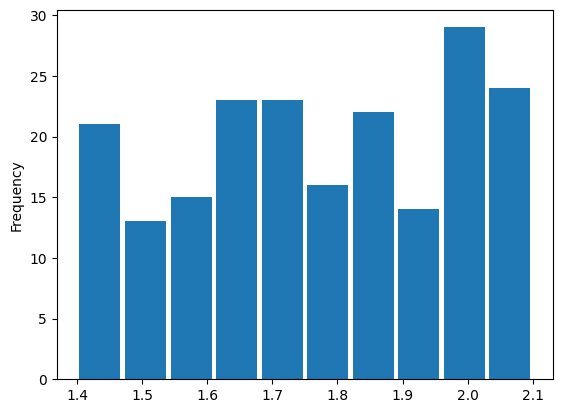

In [ ]:
#Histograma sem outliers
data_teste['altura'].plot.hist(rwidth=0.9)

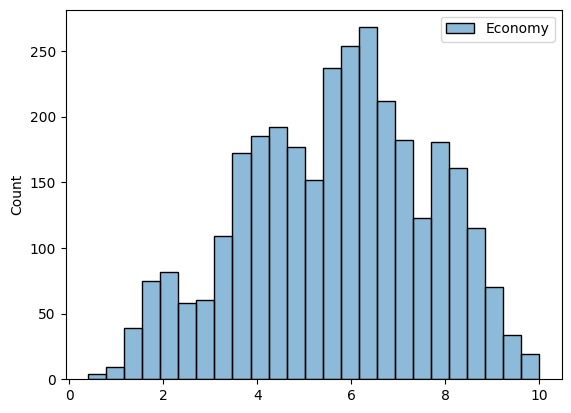

In [53]:
ax = sns.histplot(data=data_teste.iloc[:,6:7])

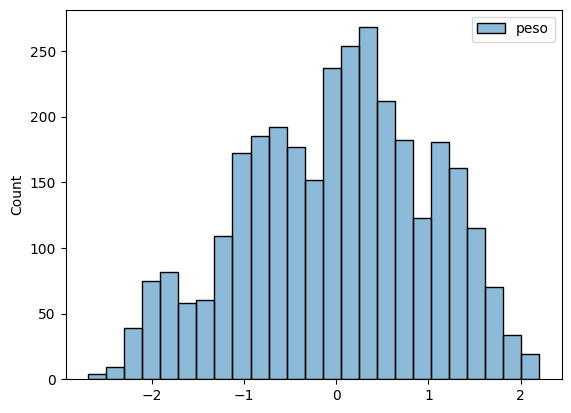

In [54]:
scaler = StandardScaler()
norm_subset = pd.DataFrame(scaler.fit_transform(data_teste.iloc[:,6:7]), columns = ['peso'])
ax = sns.histplot(data=norm_subset)

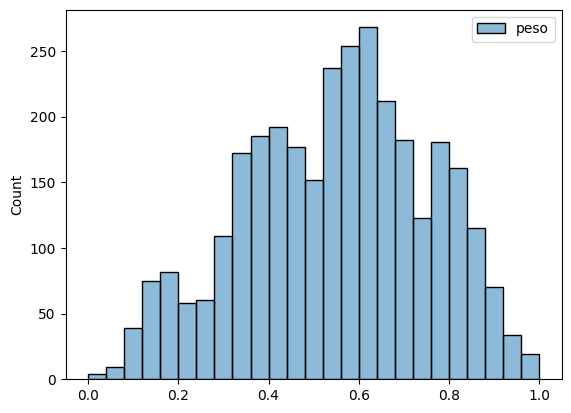

In [55]:
#Normalização
scaler = MinMaxScaler()
norm_subset = pd.DataFrame(scaler.fit_transform(data_teste.iloc[:,6:7]), columns = ['peso'])
ax = sns.histplot(data=norm_subset)

In [56]:
#Normalização
data_teste['peso'] = (data_teste['peso'] - min(data_teste['peso']))/(max(data_teste['peso']) - min(data_teste['peso']))
ax = sns.histplot(data=data_teste.iloc[:,6:7])

KeyError: 'peso'

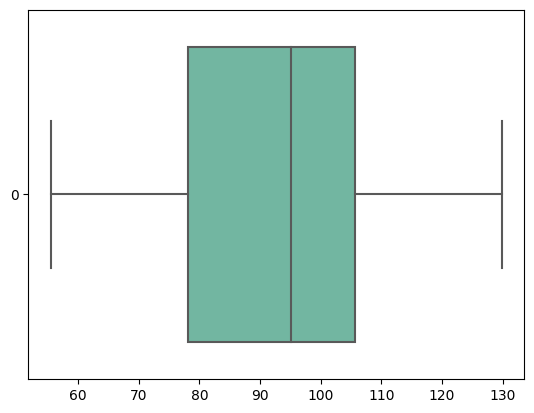

In [ ]:
#Boxplot horizontal
ax = sns.boxplot(data=data_teste['peso'], orient="h", palette="Set2")

In [57]:
result = Parallel(n_jobs=mp.cpu_count())(delayed(np.round)(data_teste[i].isna().sum()/len(data_teste[i]),6) for i in data_teste.columns)

perc_nan = pd.DataFrame(data = {'column': data_teste.columns, 'percent_nan': result})
perc_nan.sort_values(by=['percent_nan'], inplace=True, ascending=False)
perc_nan.drop(perc_nan[perc_nan['percent_nan'] == 0].index, inplace=True)
perc_nan

,column,percent_nan


### Pré-processamento dados estruturados

#### Full dataset: https://data.mendeley.com/datasets/9x62992sw6/2

In [58]:
biodata = pd.read_csv('biodiversity-br.csv')
biodata

,alt,temp2m,temp2mrange,humidity,precip,atm,wind,m.fapar,classe
0,0.361674,0.719384,0.719384,0.614403,0.594679,0.979630,0.192118,0.665940,0
1,0.067043,0.916464,0.916464,0.579856,0.516432,0.994444,0.170624,0.365190,0
2,0.039864,0.856448,0.856448,0.818496,0.624413,1.000000,0.123337,0.798657,0
3,0.064889,0.821573,0.821573,0.872974,0.632238,1.000000,0.173509,0.999390,0
4,0.025681,0.788321,0.788321,1.000000,0.871674,1.000000,0.283287,0.896407,0
...,...,...,...,...,...,...,...,...,...
860,0.118726,0.142741,0.142741,0.707414,0.397496,0.112963,0.250426,0.623997,0
861,0.014968,0.197891,0.197891,0.718044,0.369327,0.112963,0.252041,0.455267,1
862,0.129396,0.142741,0.142741,0.680308,0.367762,0.061111,0.242492,0.627834,0
863,0.000000,0.213301,0.213301,0.712463,0.350548,0.061111,0.240703,0.397279,0


In [ ]:
biodata.describe()

,alt,temp2m,temp2mrange,humidity,precip,atm,wind,m.fapar,classe
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000
mean,0.380137,0.590931,0.590931,0.504792,0.377070,0.692490,0.203849,0.509579,0.485549
std,0.238339,0.229654,0.229654,0.200538,0.170868,0.222542,0.077483,0.184468,0.500080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180918,0.421736,0.421736,0.381079,0.286385,0.540741,0.154468,0.377747,0.000000
50%,0.370410,0.622060,0.622060,0.516609,0.381847,0.720370,0.209140,0.489710,0.000000
75%,0.555053,0.777778,0.777778,0.668084,0.471049,0.879630,0.250426,0.616062,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


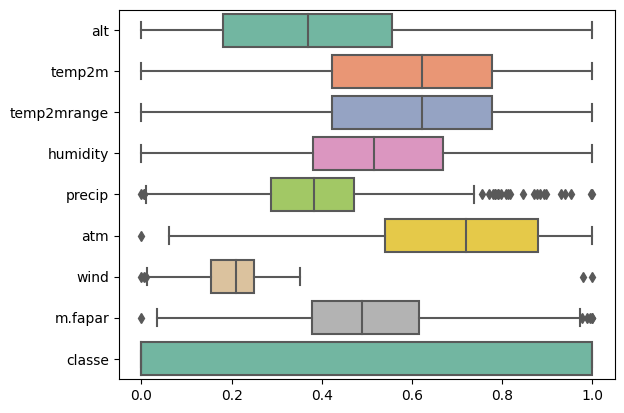

In [ ]:
ax = sns.boxplot(data=biodata, orient="h", palette="Set2")

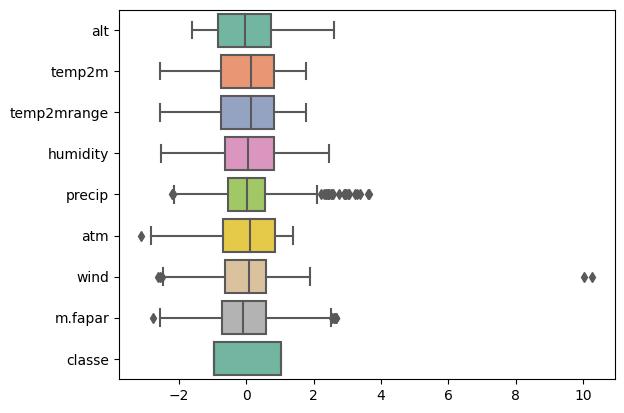

In [ ]:
scaler = StandardScaler().fit(biodata)
norm_subset = pd.DataFrame(scaler.transform(biodata), columns = biodata.columns)
ax = sns.boxplot(data=norm_subset, orient="h", palette="Set2")

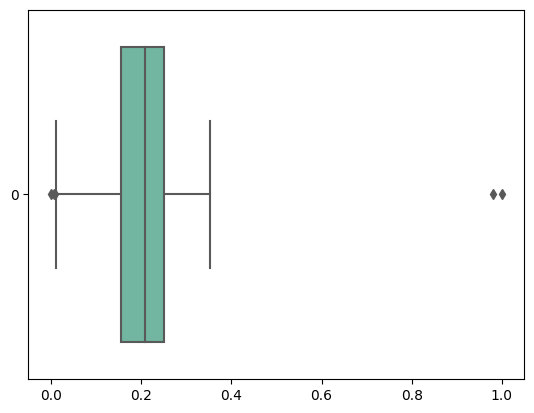

In [ ]:
ax = sns.boxplot(data=biodata['wind'], orient="h", palette="Set2")

In [ ]:
boxplot_stats(biodata["wind"]).pop(0)['fliers']

array([0.        , 0.00937653, 0.00588558, 0.98035256, 1.        ])

In [ ]:
remove_out = np.where(np.in1d(biodata["wind"],
                              boxplot_stats(biodata["wind"]).pop(0)['fliers']))
remove_out

(array([152, 184, 203, 812, 821]),)

In [ ]:
#Dados de uma instância
biodata.iloc[821, :]

alt            0.864003
temp2m         0.000000
temp2mrange    0.000000
humidity       0.790327
precip         0.508607
atm            0.274074
wind           1.000000
m.fapar        0.539152
classe         0.000000
Name: 821, dtype: float64

Text(0.5, 1.0, 'Attribute: Wind')

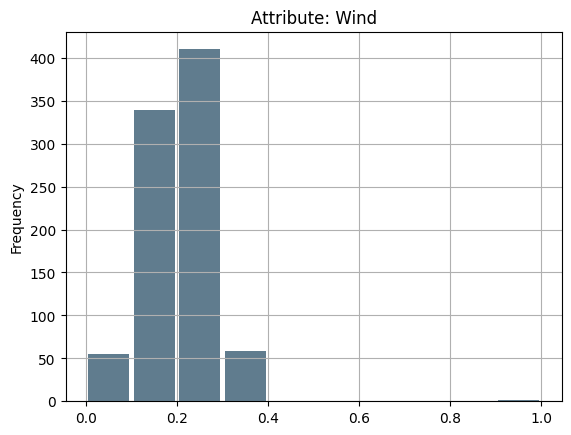

In [ ]:
biodata["wind"].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title("Attribute: Wind")

In [ ]:
biodata.drop(index=remove_out[0], inplace = True)
biodata

,alt,temp2m,temp2mrange,humidity,precip,atm,wind,m.fapar,classe
0,0.361674,0.719384,0.719384,0.614403,0.594679,0.979630,0.192118,0.665940,0
1,0.067043,0.916464,0.916464,0.579856,0.516432,0.994444,0.170624,0.365190,0
2,0.039864,0.856448,0.856448,0.818496,0.624413,1.000000,0.123337,0.798657,0
3,0.064889,0.821573,0.821573,0.872974,0.632238,1.000000,0.173509,0.999390,0
4,0.025681,0.788321,0.788321,1.000000,0.871674,1.000000,0.283287,0.896407,0
...,...,...,...,...,...,...,...,...,...
860,0.118726,0.142741,0.142741,0.707414,0.397496,0.112963,0.250426,0.623997,0
861,0.014968,0.197891,0.197891,0.718044,0.369327,0.112963,0.252041,0.455267,1
862,0.129396,0.142741,0.142741,0.680308,0.367762,0.061111,0.242492,0.627834,0
863,0.000000,0.213301,0.213301,0.712463,0.350548,0.061111,0.240703,0.397279,0


Text(0.5, 1.0, 'Attribute: Wind')

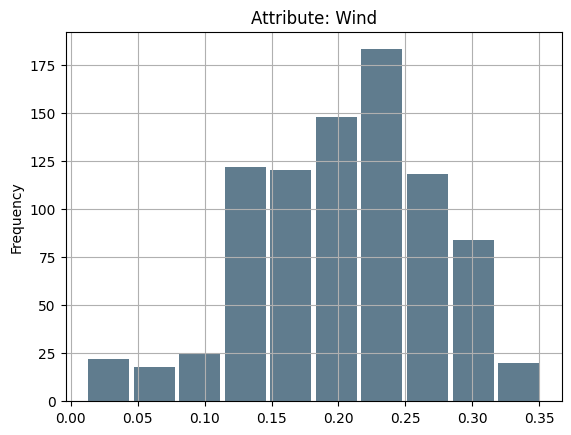

In [ ]:
biodata["wind"].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title("Attribute: Wind")

In [ ]:
biodata.corr()

,alt,temp2m,temp2mrange,humidity,precip,atm,wind,m.fapar,classe
alt,1.000000,-0.489211,-0.489211,-0.180043,-0.140888,-0.207199,-0.238908,-0.364688,0.049023
temp2m,-0.489211,1.000000,1.000000,-0.505891,-0.219734,0.884804,0.288930,-0.146101,0.035878
temp2mrange,-0.489211,1.000000,1.000000,-0.505891,-0.219734,0.884804,0.288930,-0.146101,0.035878
humidity,-0.180043,-0.505891,-0.505891,1.000000,0.761129,-0.435413,-0.273686,0.722468,0.054340
precip,-0.140888,-0.219734,-0.219734,0.761129,1.000000,-0.224684,-0.419055,0.647403,0.077419
atm,-0.207199,0.884804,0.884804,-0.435413,-0.224684,1.000000,0.286568,-0.139677,0.075643
wind,-0.238908,0.288930,0.288930,-0.273686,-0.419055,0.286568,1.000000,-0.218794,0.020387
m.fapar,-0.364688,-0.146101,-0.146101,0.722468,0.647403,-0.139677,-0.218794,1.000000,0.068333
classe,0.049023,0.035878,0.035878,0.054340,0.077419,0.075643,0.020387,0.068333,1.000000


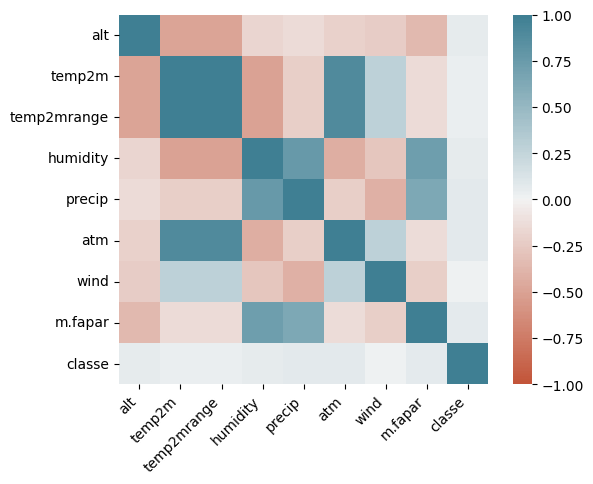

In [ ]:
corr = biodata.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);